# Load data

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import os
import pandas as pd
STFT_folder = "D:\Swarming Project buzz 2\Features Extracted Data\STFT_Features"

Noneswarming_train = np.load(os.path.join(STFT_folder, 'Train', 'Noneswarming_train.npy'))
Swarming_train = np.load(os.path.join(STFT_folder, 'Train', 'Swarming_train.npy'))

Noneswarming_test = np.load(os.path.join(STFT_folder, 'Test', 'Noneswarming_test.npy'))
Swarming_test = np.load(os.path.join(STFT_folder, 'Test', 'Swarming_test.npy'))

Noneswarming_val = np.load(os.path.join(STFT_folder, 'Val', 'Noneswarming_val.npy'))
Swarming_val = np.load(os.path.join(STFT_folder, 'Val', 'Swarming_val.npy'))

In [2]:
# Concatenate the data and create labels
X_train = np.concatenate([Noneswarming_train, Swarming_train], axis=0)
y_train = np.concatenate([np.zeros(Noneswarming_train.shape[0]), np.ones(Swarming_train.shape[0])])

X_test = np.concatenate([Noneswarming_test, Swarming_test], axis=0)
y_test = np.concatenate([np.zeros(Noneswarming_test.shape[0]), np.ones(Swarming_test.shape[0])])

X_val = np.concatenate([Noneswarming_val, Swarming_val], axis=0)
y_val = np.concatenate([np.zeros(Noneswarming_val.shape[0]), np.ones(Swarming_val.shape[0])])

In [3]:
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_val: {}".format(X_val.shape))
print("Shape of X_test: {}".format(X_test.shape))


Shape of X_train: (24732, 1024)
Shape of X_val: (4249, 1024)
Shape of X_test: (11575, 1024)


In [4]:
# Reshape the input data
X_train = X_train.reshape( (X_train.shape[0], X_train.shape[1], 1) )
X_val = X_val.reshape( (X_val.shape[0], X_val.shape[1], 1) )
X_test = X_test.reshape( (X_test.shape[0], X_test.shape[1], 1) )
y_train = y_train.reshape( (y_train.shape[0], 1) )
y_val = y_val.reshape( (y_val.shape[0], 1) )
y_test = y_test.reshape( (y_test.shape[0], 1) )

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_val: {}".format(X_val.shape))
print("Shape of X_test: {}".format(X_test.shape))


Shape of X_train: (24732, 1024, 1)
Shape of X_val: (4249, 1024, 1)
Shape of X_test: (11575, 1024, 1)


In [5]:
# Shuffle the data
shuffle_train = np.random.permutation(len(X_train))
X_train, y_train = X_train[shuffle_train], y_train[shuffle_train]

shuffle_test = np.random.permutation(len(X_test))
X_test, y_test = X_test[shuffle_test], y_test[shuffle_test]

shuffle_val = np.random.permutation(len(X_val))
X_val, y_val = X_val[shuffle_val], y_val[shuffle_val]

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()

# Fit and transform on training data
y_train = label_encoder.fit_transform(y_train)

# Use the same label encoder to transform validation and test data
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)


e:\anaconda\envs\pytorch\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\anaconda\envs\pytorch\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
e:\anaconda\envs\pytorch\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [7]:
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import *
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import *
from tensorflow.keras.callbacks import *
import time

In [8]:
model = models.Sequential()
model.add(layers.Conv1D(16, 3, activation='relu', input_shape=(X_train.shape[1:])))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(128, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1022, 16)          64        
                                                                 
 max_pooling1d (MaxPooling1  (None, 511, 16)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 509, 32)           1568      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 254, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 252, 64)           6208      
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 126, 64)           0

In [10]:
earlystopper = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

In [11]:
epochs = 100
batch_size = 64
current_time = int(time.time())
stop_training_callback = earlystopper
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_data=(X_val, y_val), 
                    callbacks=[stop_training_callback])
print("Training completed in {} seconds.".format(int(time.time()-current_time)))

Epoch 1/100




387/387 [==============================] - 15s 34ms/step - loss: 0.6289 - accuracy: 0.5964 - val_loss: 0.4943 - val_accuracy: 0.8044
Epoch 2/100
387/387 [==============================] - 13s 33ms/step - loss: 0.4975 - accuracy: 0.7633 - val_loss: 0.3871 - val_accuracy: 0.7990
Epoch 3/100
387/387 [==============================] - 13s 34ms/step - loss: 0.4215 - accuracy: 0.7724 - val_loss: 0.3104 - val_accuracy: 0.8414
Epoch 4/100
387/387 [==============================] - 13s 35ms/step - loss: 0.3506 - accuracy: 0.8053 - val_loss: 0.2318 - val_accuracy: 0.9984
Epoch 5/100
387/387 [==============================] - 13s 33ms/step - loss: 0.2732 - accuracy: 0.9725 - val_loss: 0.1599 - val_accuracy: 0.9993
Epoch 6/100
387/387 [==============================] - 13s 33ms/step - loss: 0.1956 - accuracy: 0.9845 - val_loss: 0.0935 - val_accuracy: 0.9993
Epoch 7/100
387/387 [==============================] - 13s 32ms/step - loss: 0.1298 - accuracy: 0.9907 - val_loss: 0.0484 - val_accuracy: 0.

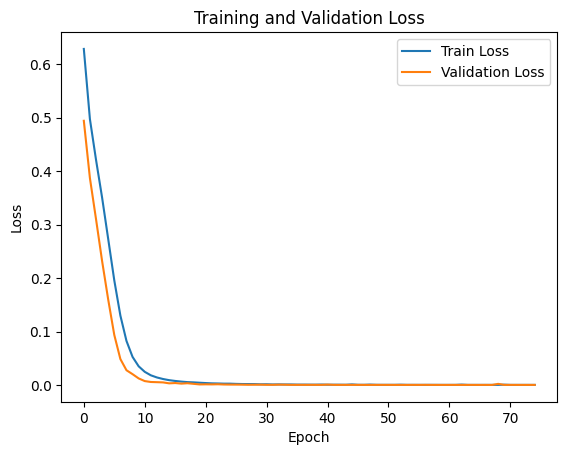

In [12]:
plt.plot(history.history['loss'], label='Train Loss')
# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Save the plot
plt.savefig('training_loss 1D_CNN (80 MFCCs Features_plot.png')
plt.show()

In [13]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Training Loss: {train_loss}")
print(f"Training Accuracy: {train_accuracy}")

val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

  1/773 [..............................] - ETA: 32s - loss: 6.5102e-05 - accuracy: 1.0000

773/773 [==============================] - 4s 6ms/step - loss: 1.2504e-04 - accuracy: 1.0000
Training Loss: 0.00012503881589509547
Training Accuracy: 1.0
133/133 [==============================] - 1s 7ms/step - loss: 1.6988e-05 - accuracy: 1.0000
Validation Loss: 1.6988418792607263e-05
Validation Accuracy: 1.0
362/362 [==============================] - 2s 6ms/step - loss: 0.0212 - accuracy: 0.9986
Test Loss: 0.021187514066696167
Test Accuracy: 0.9986177086830139


362/362 [==============================] - 2s 6ms/step


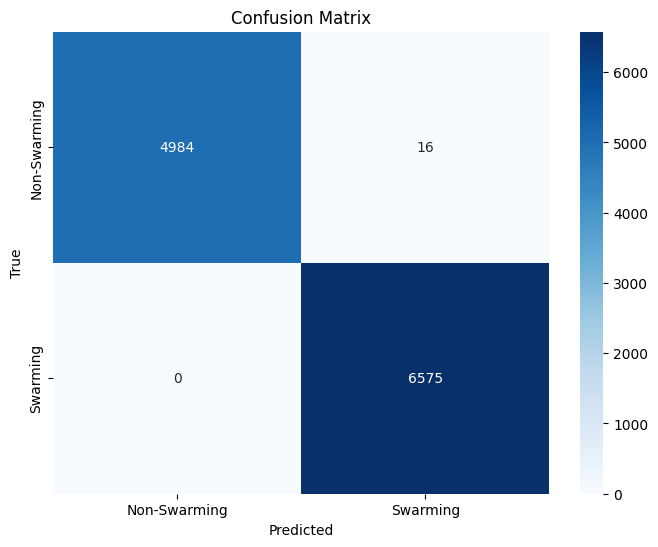

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Assuming a threshold of 0.5 for binary classification

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Swarming', 'Swarming'], 
            yticklabels=['Non-Swarming', 'Swarming'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('Confusion Matrix 1D_CNN ( 80 MFCCs Features ).png')
plt.show()